<a href="https://colab.research.google.com/github/OctavaOrigin/Classic-Machine-Learning/blob/main/%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_raw = fetch_california_housing()
target = data_raw.target
data = pd.DataFrame(data_raw.data, columns = data_raw.feature_names)

In [ ]:
X = data
y = target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.5757877060324508

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.6260338073892127

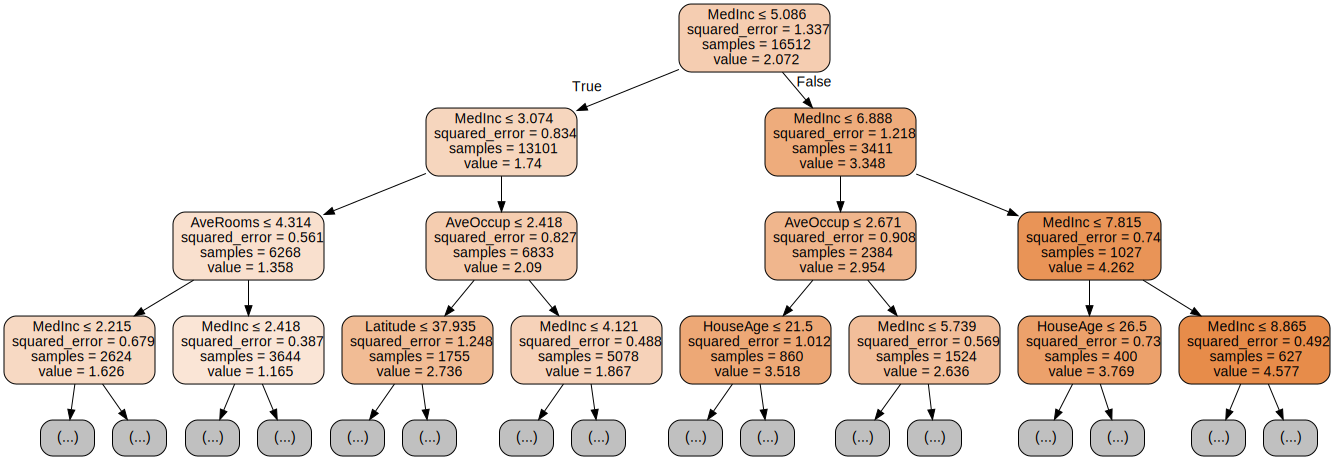

In [ ]:
from sklearn import tree
import graphviz

# Визуализация дерева решений
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names = data_raw.feature_names,
                                class_names = data_raw.target_names,
                                filled=True, rounded=True,
                                special_characters=True,
                                max_depth=3)
graph = graphviz.Source(dot_data)

# Отображение визуализации дерева решений
graph

In [ ]:
model.tree_.max_depth

34

Ограничим глубину до 20

In [ ]:
model = DecisionTreeRegressor(max_depth = 20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.6248549988502267

Разницы 0

In [ ]:
model = DecisionTreeRegressor(max_depth = 10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.6842298995638498

Оп-оп, точность начала расти. Уменьшим глубину ещё до 8

In [ ]:
model = DecisionTreeRegressor(max_depth = 8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.6776920615714156

In [ ]:
Стало хуже

In [ ]:
model = DecisionTreeRegressor(max_depth = 9)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.6826662120368245

Значит идеальная глубина была 10